# Fake News - Data Structures and Algorithms Analysis
First lets begin by understanding what exactly is Machine Learning:-
<div align="center">
  <img src="types_of_ML.png" width="500" height="600">
</div>
Machine learning is an sub discipline of artificial intelligence (AI) that enables the systems with the ability to automatically learn and improve from previous experiences without being explicitly programmed. Machine learning algorithms are often categorized as :-
* Supervised, 
* Unsupervised or 
* Reinforcement .

### What is Supervised Machine Learning?
In Supervised learning, you train the machine using data which is well “labeled.” It means some data is already tagged with the correct answer. It can be compared to learning which takes place in the presence of a supervisor or a teacher. A supervised learning algorithm learns from labeled training data, helps you to predict outcomes for unforeseen data. Type of popular Supervised leanring:-
* Regression - The ability of the algorithm to predict a numerical or continuous output variables.
* Classification - The ability of the algorithm to predict discrete or categorical output variables. (Foe this assignment i will be focusing on this topic)

### What is Unsupervised Learning?
Unsupervised learning is a machine learning technique, where you do not need to supervise the model. Instead, you need to allow the model to work on its own to discover information. It mainly deals with the unlabelled data. Unsupervised learning algorithms allows you to perform more complex processing tasks compared to supervised learning.

### What is Reinforcement Learning?
Being one of the sub-disciplines of machine learning, it states the notion of maximizing the rewards of a learning agent by the action taken by it in a particular environment. So generally the actions can be divided into two parts - mainly Positive reinforcement or a reward and a negative reinforcement or a punishment. To explain in short, the agent receives a reward for each action which results in the desired result otherwise a punishment which helps the agent to learn and adjust its behaviour accordingly.

## Data Structures Analysis
I am serious when i say that one of the most common and easiest data structure in computer science is also the most important data structure in Machine learning. To elaborate on why is it so :-
<div align="center">
  <img src="arrays.png" width="300" height="300">
</div>
* Arrays are important because they are used in linear algebra: the most useful and powerful mathematical tool at your disposal.
* The insertion/Retrieval time of a element in an array is always constant which helps in fast processing of data. O(1) is the contant time of retrieving data and storing while the space complexity is O(n) which is proportional to the elements of the array
* Almost all the libraries in python use arrays as they are base for Matrix multiplication which helps the algorithm to learn weights which fit the current dataset.

This was all considering that you are planning on using the built in methods/algorithms of the open source libraries currently present. But if you are going to be building your own system with its own algorithms, then there is no restriction on using any data structures. For examlpe a binary tree which cane be used to construct a Tree for rach word representation. As the value in the left child is always less than the value in the parent node, which in turn is smaller than that of the right child. Thus, data in binary trees is automatically sorted. Both insertion and access are efficient at O(log n) on average. Like linked lists, they are easy to transform into arrays and this is the basis for a tree-sort.

# Algorithms Analysis
Over the past few decades there have a major advancement in the field of Machine Learning, Deep Learning and Reinforcement Learning. With development of algorithms like YOLO, YOLO2, transformers and many more we are now able to develop self driving cars, machine which are able to understand human languages and do task based on human speech, amongst other amazing feats.

In order to analyse the various algoruthm we will look at the following points:-
* Accuracy of the algorithm
* Time taken to fit the train dataset
* Popularity

## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import time, re, nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=Warning)

train = pd.read_csv("train.csv")

## Exploratory Data Analysis, Data Cleaning and Preprocessing

In [2]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
train["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

Looks like its an almost balanced dataset

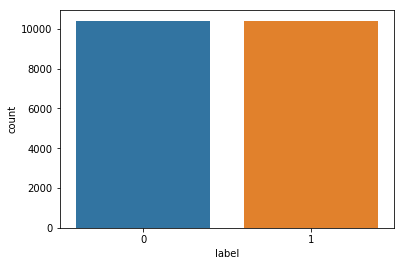

In [4]:
sns.countplot(x = train["label"])

Lets build a word chart, where the bigger the word bigger is the significance/frequency in the dataset

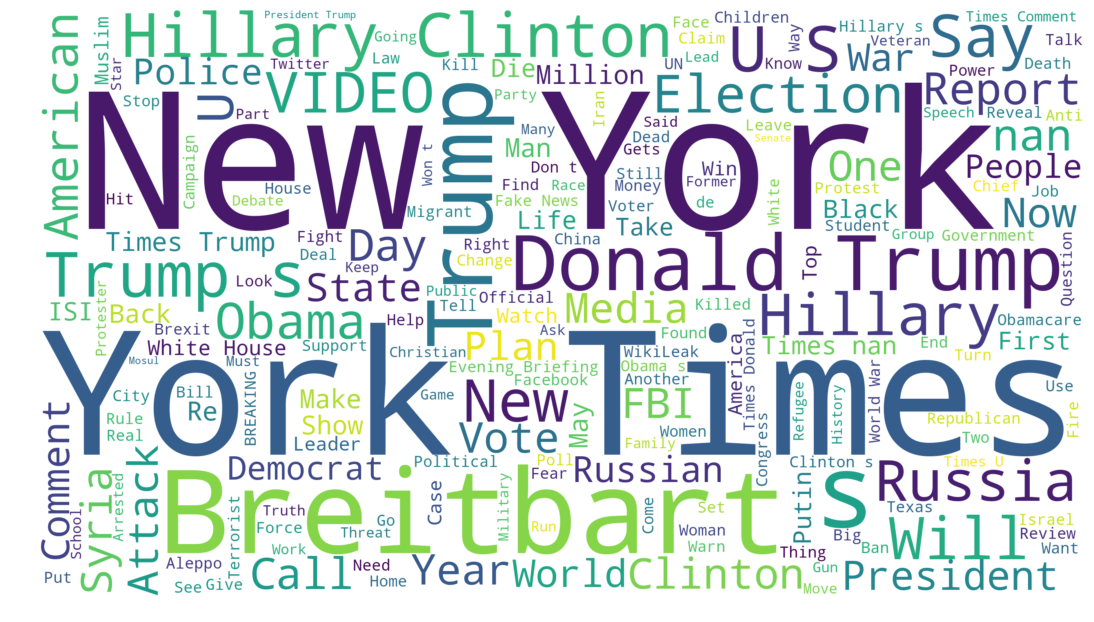

In [5]:
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=2560, height=1440).generate(' '.join(train['title'].astype('str')))

ax = plt.subplots(figsize=(15, 15), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

In [6]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
train=train.fillna('Unknown')

train['total'] = train['title'] +' ' + train['author']
msg = train.drop('label',axis=1).copy()
y = train['label']
voc_size = 5000

In [8]:
ps = PorterStemmer()
corpus = []
for i in range(len(msg)):
    review = re.sub('[^a-zA-Z]',' ',msg['total'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
# Converting to one hot representation
onehot_rep = [one_hot(words,voc_size)for words in corpus]

# Padding Sentences to make them of same size
embedded_docs = pad_sequences(onehot_rep,padding='pre',maxlen=25)
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [9]:
# final Shape
X_final.shape,y_final.shape

((20800, 25), (20800,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25,random_state=0)

## 1. Naive Bayes (GaussianNB)
Being one of the simplest supervised learning algorithm - Naive Bayes is a statistical classification technique based on Bayes Theorem. It is the fast, accurate and reliable algorithm. This kind of algorithm performs with speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.

<img src="naive_bayes.png" width="150" height="150">

##### Drawbacks:-
* One of the most important disadvantage of Naive Bayes is that it considers that all the features are independent which rarely happens in real life.
* When a particular category in a categorical column is not present in the training set but present in the test set, the theorem allocates 'zero probablility' to it and is known as  'zero-frequency problem'

In [11]:
start = time.time()
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
end = time.time()

print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(naive_bayes.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(naive_bayes.score(X_test, y_test)))

print(round(end - start, 2), " secs to train the model")

Accuracy of Naive Bayes classifier on training set: 0.51
Accuracy of Naive Bayes classifier on test set: 0.50
0.01  secs to train the model


# 2. Logistic Regression
It is a statistical model which is trained to predict the classification of objects. Although the name suggests it is a regression technique, its is a statistical method that uses logistic function to learn a binary dependent variable like True/False, Yes/No, Alive/Dead etc. This can be extented to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one. Model is defined by:-</br>

**Output** = 0 or 1 </br>
**Hypothesis** => Z = WX + B</br>
**hΘ(x)** = sigmoid (Z)</br>

Now , in order to make a decision like whether a particular email is Spam or not a threshold Decision Boundry is decided which seperates the two classes. For eg, if a boundry of 0.5 is chosen then above 0.5 the mail is spam otherwise it is not. The value of the boundry has to lie between 0 and 1 exluded as the value of the logit function(sigmoid) is always [0,1].

##### Drawbacks:-
* One of the major limitation of this method is the assumption of linearity between the dependent variable and the independent variables.
* Multicollinearity between independent variables is assumed to be either average or nothing
* The boundries developed by the method to seperate the classes is linear and doesnt sit well with non linear data. 

In [12]:
start = time.time()
lg = LogisticRegression()
lg.fit(X_train, y_train)
end = time.time()

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(lg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(lg.score(X_test, y_test)))

print(round(end - start, 2), " secs to train the model")

Accuracy of Logistic Regression classifier on training set: 0.70
Accuracy of Logistic Regression classifier on test set: 0.69
0.3  secs to train the model


# 3. Random Forest Classifier
One of the most prominent and common ensemble methods out there that is being used on a day to day basis is the Random Forest Ensemble method. It uses various Decision Trees as its base estimators (the total number of estimators to be used is classified when the class method is declared). A algorithm which is a ensemble, uses methods to abids by machine learning rules by calculating the result on multiple base estimators and adjusting them till the rules set by the user is met and then as a final result to be outputed the results from each of the base estimator is aggregated together to produce one single result. The dataset in each of the base estimator is split based on either of the two rules, namely information gain or the Gini impurity. So, in generallity it can be said that a ensemble method is a stacking of similar types of estimators to get a better result that a sungle estimator which tends to overfit when trained on a dataset with sufficient dataset.
<div align="center">
  <img src="random_forest.png" width="450" height="450">
</div>
[Source of image](https://corporatefinanceinstitute.com/resources/knowledge/other/random-forest/)

##### Drawbacks:-
* Interpretability of a models helps us to understand the inner working of how a model came o a particular solution (like in RNN learned weigths can be accessed) but Random forest models are not all that interpretable; they are like black boxes.
* More the number of estimators more time it would take for the dataset to fit to the model.

In [13]:
start = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
end = time.time()

print('Accuracy of Random Forest Classifier classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

print(round(end - start, 2), " secs to train the model")

Accuracy of Random Forest Classifier classifier on training set: 1.00
Accuracy of Random Forest Classifier classifier on test set: 0.91
3.32  secs to train the model


# 4. Recurrent Neural Network
Moving on to more modern, or so to say, machine learning methods which have gotten the best results so far in this assignment as well as the real world are neural networks. Although, even the most basic algorithm like logistic regression is considered as a shallow neural network. These kind of networks discovered in the late 1940s.

[Quoted from Wikipedia](https://en.wikipedia.org/wiki/Recurrent_neural_network)
"A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.

The term “recurrent neural network” is used indiscriminately to refer to two broad classes of networks with a similar general structure, where one is finite impulse and the other is infinite impulse. Both classes of networks exhibit temporal dynamic behavior. A finite impulse recurrent network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward neural network, while an infinite impulse recurrent network is a directed cyclic graph that can not be unrolled."
<div align="center">
  <img src="rnn.png" width="250" height="250">
</div>
[Source of image](https://towardsdatascience.com/recurrent-neural-networks-rnns-3f06d7653a85)

##### Drawbacks:-
* To begin with the major drawback of a RNN is the amount of data, memory and computational power needed to train a model.
* Another porblem a RNN is faced with is the problem of vanishing gradient and exploding gradients which come with longer sequences. 

In [14]:
model = Sequential()
model.add(Embedding(voc_size,40,input_length=25))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

start = time.time()
model.fit(X_train, y_train,epochs=5,batch_size=64)
end = time.time()

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy of Recurrent Neural Network on test set "+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print(round(end - start, 2), " secs to train the model")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
15600/15600 [==============================] - 11s 678us/sample - loss: 0.1695 - acc: 0.9296
Epoch 2/5
15600/15600 [==============================] - 9s 590us/sample - loss: 0.0201 - acc: 0.9945
Epoch 3/5
15600/15600 [==============================] - 10s 614us/sample - loss: 0.0082 - acc: 0.9974
Epoch 4/5
15600/15600 [==============================] - 9s 585us/sample - loss: 0.0037 - acc: 0.9992
Epoch 5/5
15600/15600 [==============================] - 9s 561us/sample - loss: 0.0038 - acc: 0.9988
Accuracy of Recurrent Neural Network on test set acc: 99.06%
49.48  secs to train the model


# Conclusion
We can use which-ever method we like, as the situation requires becuase no method is prefect as depicted above. For example when we have limited resources but still need a good accuracy but not a explanation on how we reached the result, Random Forest can be chosebn but when we need high accuracy and have good amount of resources we go with RNNs. Therefore depending on the situation and the requirements of the user/client different machine leanring methods needs to be choosen.

With the active research and development in the field of Machine Learning and Deep Learning it would be prudent to say that these are the methods what industry has to offer, as with each growing day new methods which are more efficient and convinent to use are been researched on which make full use of the todays hardware and software capabilities.